House in USA DataScience Project

Imports

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import requests
import seaborn as sns
House Rocket 

# Dataset Overview

**Dataset upload**

In [2]:
df = pd.read_csv('/home/thamirisbrandao/code/thamirisbrandao/house_salesUSA/house_salesUSA/data/kc_house_data.csv', parse_dates=['date'])


**Dataset Overview**

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

**Preprocessing Dataset**

In [5]:
df.duplicated().sum()

0

In [6]:
missing_col = df.isnull().sum().sort_values(ascending=False)
missing_col

id               0
grade            0
sqft_living15    0
long             0
lat              0
zipcode          0
yr_renovated     0
yr_built         0
sqft_basement    0
sqft_above       0
condition        0
date             0
view             0
waterfront       0
floors           0
sqft_lot         0
sqft_living      0
bathrooms        0
bedrooms         0
price            0
sqft_lot15       0
dtype: int64

## Analysis of number of bedrooms:

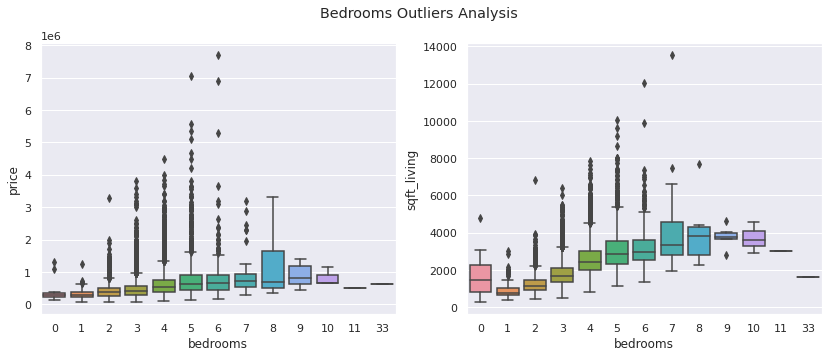

In [7]:
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize= (14,5))
fig.suptitle('Bedrooms Outliers Analysis')

#create boxplot in each subplot
sns.boxplot(data=df, x="bedrooms", y="price", ax=axes[0])
sns.boxplot(data=df, x="bedrooms", y="sqft_living", ax=axes[1]);

*Quantity of houses with ZERO bedroom*

In [8]:
no_bed_0 = (df[df['bedrooms']<1].value_counts().sum())
no_bed_11 = (df[df['bedrooms']==11].value_counts().sum())
no_bed_33 = (df[df['bedrooms']==33].value_counts().sum())

perc_no_bed = round((no_bed_0 + no_bed_11 + no_bed_33)*100/len(df),2)
print(f"Excluding the data with ZERO bedrooms, which represents {perc_no_bed}%")

Excluding the data with ZERO bedrooms, which represents 0.07%


Graphs shows bedrooms outliers for Zero bedrooms, 11 bedrooms and 33 bedrooms with low prices but high living areas, we will drop the columns, total of 13 lines

## Excluding the lines for bedrooms = 0, 11, 33

In [9]:
df = df[(df['bedrooms']>=1) & (df['bedrooms']<11)]
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Checking Bathrooms

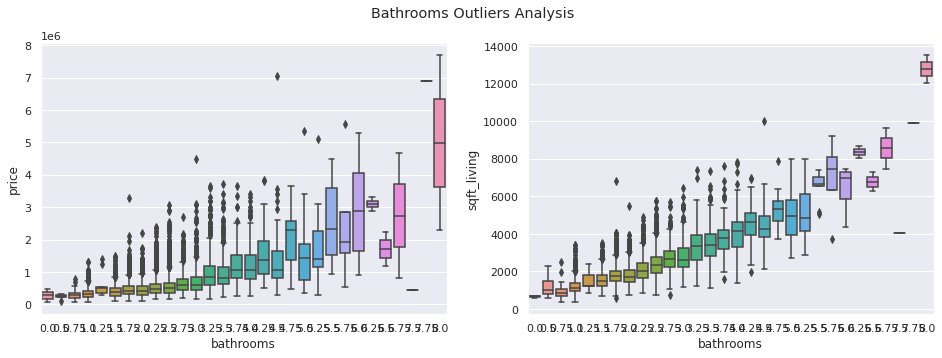

In [10]:
#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize= (16,5))
fig.suptitle('Bathrooms Outliers Analysis')

#create boxplot in each subplot
sns.boxplot(data=df, x="bathrooms", y="price", ax=axes[0])
sns.boxplot(data=df, x="bathrooms", y="sqft_living", ax=axes[1]);

# Data pre-analysis

**Correlation**

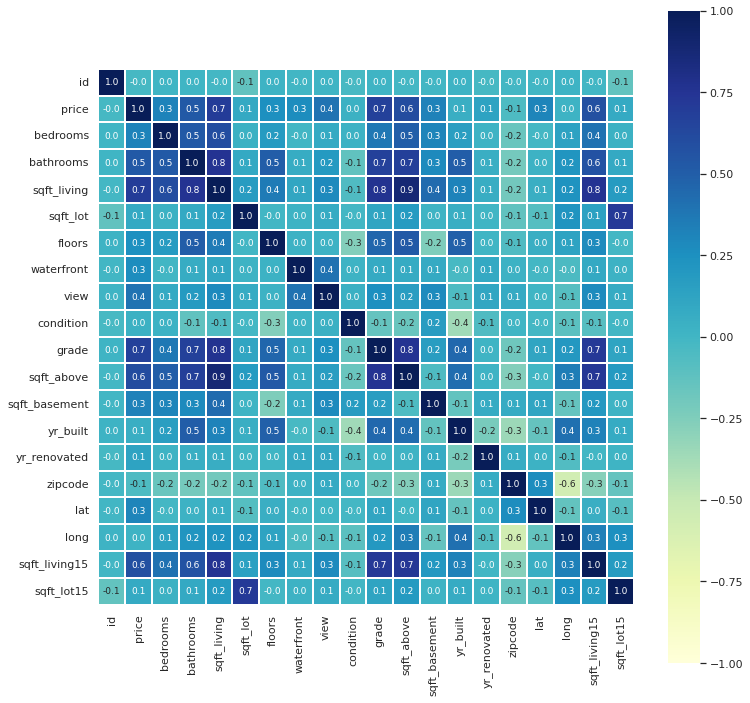

In [11]:
# corr = df.corr() -- Pearson Correlation

fig, ax = plt.subplots(figsize = (12, 12))
# Heatmap
sns.heatmap(df.corr(), cmap = "YlGnBu", annot = True, fmt = ".1f", annot_kws = {"fontsize": 9},
            vmin = -1, vmax = 1, square = True, linewidths = 0.01, linecolor = "white", cbar = True)

sns.despine(top = True, right = True, left = True, bottom = True)

In [12]:
# Focusing on house prices
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701941
grade            0.667781
sqft_above       0.605431
sqft_living15    0.585322
bathrooms        0.525903
view             0.397331
sqft_basement    0.323816
bedrooms         0.316602
lat              0.306850
waterfront       0.266434
floors           0.256901
yr_renovated     0.126510
sqft_lot         0.089830
sqft_lot15       0.082755
yr_built         0.054029
condition        0.036093
long             0.021840
id              -0.016707
zipcode         -0.053353
Name: price, dtype: float64

In [13]:
# Looking at the highest correlation features with price:
df_corr = df[['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'bedrooms']]

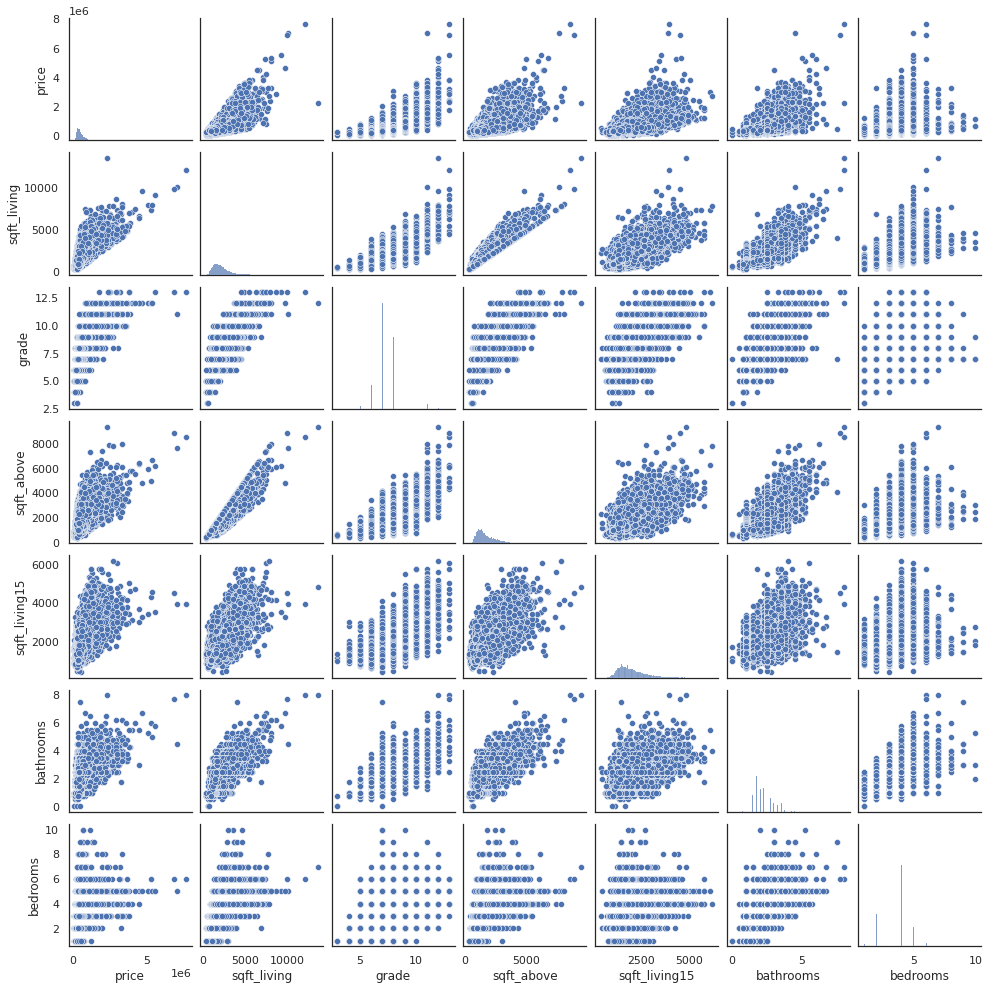

In [14]:
sns.set(style='white')
sns.pairplot(df_corr, height=2)
plt.show()

In [15]:
df_summary = df[['price', 'bedrooms', 'bathrooms', 'sqft_living']].sort_values(by = 'price', ascending=False)
df_summary.head(20)

,price,bedrooms,bathrooms,sqft_living
7252,7700000.0,6,8.00,12050
3914,7062500.0,5,4.50,10040
9254,6885000.0,6,7.75,9890
4411,5570000.0,5,5.75,9200
1448,5350000.0,5,5.00,8000
1315,5300000.0,6,6.00,7390
1164,5110800.0,5,5.25,8010
8092,4668000.0,5,6.75,9640
2626,4500000.0,5,5.50,6640
8638,4489000.0,4,3.00,6430


# Descriptive Analysis

## CEO Queries:

👇  Why the CEO has raised questions about the business plan?

Se você fosse ele, porque você perguntaria isso? Quer aumentar receita? A empresa está indo bem?

Sales in 2015 has decreased 48% compared to 2014

 sales in 2015 has been 47.97% lower than 2014


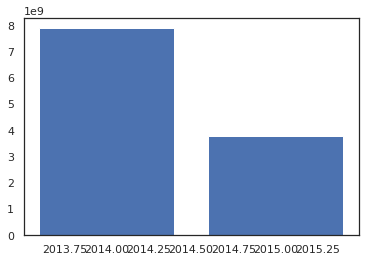

In [16]:
df['df_year'] = df['date'].dt.year
resul = df.groupby('df_year')['price'].sum().reset_index()
resul
plt.bar(resul.df_year, resul.price)
vendas_2014 = resul.price[0]
vendas_2015 = round((resul.price[1]/vendas_2014)*100,2)
#print(vendas_2014)
print(f" sales in 2015 has been {vendas_2015}% lower than 2014")

Hipóteses sobre o Comportamento do Negócio

Casas com muitos quartos são mais caras? Porque? A partir de quantos quartos o preço aumenta? Qual o incremento de preço por cada quarto adicionado?

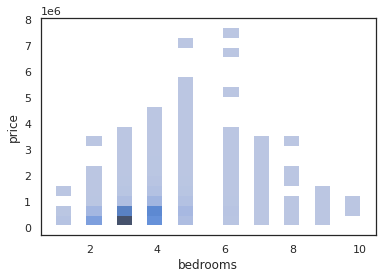

In [17]:
sns.histplot(data = df, x = 'bedrooms', y = 'price', bins = 20, kde = False);

In [18]:
df_bed = pd.get_dummies(df['bedrooms'])
df_bed

,1,2,3,4,5,6,7,8,9,10
0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
21608,0,0,1,0,0,0,0,0,0,0
21609,0,0,0,1,0,0,0,0,0,0
21610,0,1,0,0,0,0,0,0,0,0
21611,0,0,1,0,0,0,0,0,0,0


In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
enc = OneHotEncoder(handle_unknown='ignore')
X = df['bedrooms']
y = df['price']
enc.fit(X)

ValueError: Expected 2D array, got 1D array instead:
array=[3 3 2 ... 2 3 2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
df[['price']]

In [ ]:
df[df[['bedrooms']]==1]

### Linear Regression model: Price vs Bedrooms

In [ ]:
sns.regplot(data = df, x = 'bedrooms', y = 'price')

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
model1 = smf.ols(formula = 'price ~ bedrooms', data=df).fit()
model1.summary()

In [ ]:
model1.params

# Base Modelling

👇 Prepare the feature set `X` and target `y`. Remember that we want to model the `SalePrice` with the preprocessed features.

In [ ]:
X = df.drop(columns=['price','id','date'])
y = df['price']

👇 Cross validate a linear regression model. The score under variable name saved as `base_model_score`.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()

scores = cross_val_score(model, X, y, cv=10)

base_model_score = scores.mean()

base_model_score

👇 Feature Permutation to identify the importance of each feature in the model

In [ ]:
from sklearn.inspection import permutation_importance

model = LinearRegression().fit(X, y) # Fit model

permutation_score = permutation_importance(model, X, y, n_repeats=300) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results

importance_df.columns=['feature','feature importance'] # Change column names

importance_df.sort_values(by="feature importance", ascending = False) # Order by importance

Removing floors form the model, as it shows the lowest importance

In [ ]:
X_floors = df.drop(columns=['price','id','date', 'floors'])
y = df['price']

In [ ]:
model_floors = LinearRegression()

scores_floors = cross_val_score(model_floors, X_floors, y, cv=10)

base_model_score_floors = scores_floors.mean()

base_model_score_floors

# Multivariate Linear Regression (with statsmodel)

Selecting the features for our model

In [ ]:
df.columns

In [ ]:
features = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [ ]:
formula = "price ~ " + ' + '.join(features)

⚖️ **Standardize the features.**

👉 In a `multivariate linear regression`, we are trying to measure the impact of each feature on the target. 
    
⚠️ Because of scale effects, some features will wrongly be seen as more important than others


📅 , we will discover Machine Learning Algorithms. We will also need to perform some scaling operations before trying to predict any target.

In [ ]:
orders_standardized = df.copy()
for f in features:
    mu = df[f].mean()
    sigma = df[f].std()
    orders_standardized[f] = df[f].map(lambda x: (x - mu) / sigma)
orders_standardized

In [ ]:
import statsmodels.formula.api as smf
model_OS = smf.ols(formula = formula, data = orders_standardized).fit()
print(model_OS.summary())